In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from salt_pepper_m import salt_pepper
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

[[ 0.         -0.27348297]
 [ 0.          0.        ]]


In [2]:
# Load a color image in grayscale
img = cv2.imread('boat.jpg',0).astype(float)/255
#img = cv2.imread('boat.jpg',0)

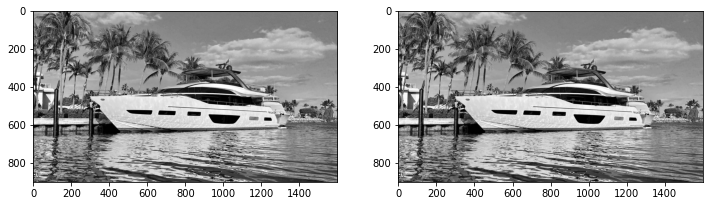

In [3]:
# Show image
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.show()

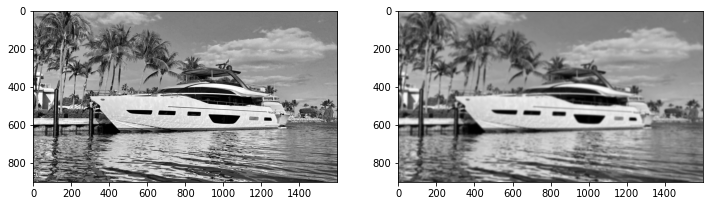

In [4]:
# Gaussian filtering
img_blur=cv2.GaussianBlur(img,(21,21),cv2.IMREAD_UNCHANGED)
plt.subplot(121)
plt.imshow(img,cmap='gray',vmin=0,vmax=1)
plt.subplot(122)
plt.imshow(img_blur,cmap='gray',vmin=0,vmax=1)
plt.show()

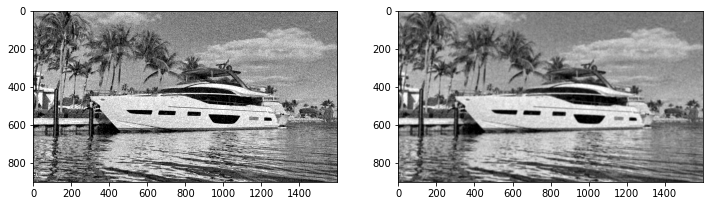

In [5]:
#Denoising
noise_std=0.2
ker_size=15

gauss_noise=np.random.randn(img.shape[0],img.shape[1])*noise_std
img_noise=img+gauss_noise


img_denoise=cv2.GaussianBlur(img_noise,(ker_size,ker_size),cv2.IMREAD_UNCHANGED,borderType=cv2.BORDER_REFLECT)


plt.subplot(121)
plt.imshow(img_noise,cmap='gray',vmin=0,vmax=1)
plt.subplot(122)
plt.imshow(img_denoise,cmap='gray',vmin=0,vmax=1)
plt.show()


255


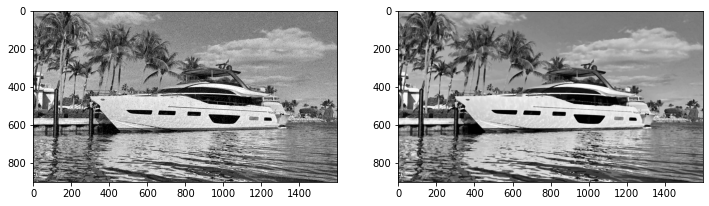

In [16]:
#Median filter
sp_noise=salt_pepper(0.05,1,img.shape[0],img.shape[1])
img_sp_noise=(np.clip((img+sp_noise),0,1)*255).astype('uint8')

print(np.max(img_sp_noise))

ker_size=3
img_denoise_sp=cv2.medianBlur(img_sp_noise,5)


plt.subplot(121)
plt.imshow(img_sp_noise,cmap='gray',vmin=0,vmax=255)
plt.subplot(122)
plt.imshow(img_denoise_sp,cmap='gray',vmin=0,vmax=255)
plt.show()

